# Exploratory analysis of film distribution data

# Research analysis of film distribution data

## 🎬 Analysis of film distribution and government support for films

## 📌 Project Description
This study analyzes film distribution data, including films that received state support. The main focus is on the dynamics of film releases, box office receipts and the influence of various factors (budget, genre, age rating) on the success of a movie.  

It also looks at how effective state support for the film industry is: whether films pay off, which genres receive funding more often, and which projects have been the most successful or failed.

## 🎯 Purpose of the study
To identify key patterns in movie distribution and identify factors that influence movie payback. Specifically:  
- How have movie release patterns changed by year?  
- What is the proportion of films with known box office receipts, and how has it changed over time?  
- What age categories of movies gross the most money?  
- How much do government-supported films recoup?  
- Which genres and types of movies are more likely to receive funding?  
- Which films have been the most successful and most unprofitable?  

## 🔍 Study Design
### **Step 1: Data Exploration**
- Opening and reviewing the dataset.
- Identify data structure, column types, and possible anomalies.
  
### **Step 2. Data preprocessing**
- Validation and data type matching.
- Analyzing and handling omissions.
- Finding and eliminating duplicates.
- Analyzing categorical and quantitative columns, identifying problematic values.
- Adding new columns:
  - Year of rental.
  - Main director.
  - Main genre.
  - Share of state support in the budget.

### **Step 3: Exploratory Data Analysis**
- Analyze the dynamics of film release.
- Evaluate the completeness of the data by year.
- Analyze the total box office of films by year.
- Analyze the impact of age rating on box office.

### **Step 4: Analyze films with government support**.
- Analyze the total amount of government support.
- Evaluate the return on investment of supported films.
- Identify popular genres among funded projects.
- Identify the most successful and unprofitable state-funded films.

### **Step 5: Overall Conclusion**
- Summarize the results of the study.
- Identified patterns and recommendations for further analysis.

### 📌 Expected results
The study will provide us with an understanding of trends in film distribution and payback rates, and we will be able to assess the effectiveness of government support. The analysis will help identify the factors that determine a movie's success and provide recommendations for improving funding and distribution strategy. 🎥📊


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
#Let's load the datasets
try:
    df_movies = pd.read_csv('')
    df_shows = pd.read_csv('')
except:
    df_movies = pd.read_csv('')
    df_shows = pd.read_csv('')

In [6]:
# Let's see what's inside the datasets
print(df_movies.head(1).T)
print(df_movies.info())
print(df_shows.head())
print(df_shows.info())

                                                                       0
title                                                   Открытый простор
puNumber                                                       221048915
show_start_date                                 2015-11-27T12:00:00.000Z
type                                                      Художественный
film_studio            Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...
production_country                                                   США
director                                                   Кевин Костнер
producer                       Дэвид Валдес, Кевин Костнер, Джейк Эбертс
age_restriction                              «18+» - запрещено для детей
refundable_support                                                   NaN
nonrefundable_support                                                NaN
budget                                                               NaN
financing_source                                   

In [7]:
# Since the tables have a common field puNumber, let's merge them by this field
# Convert puNumber in df_shows to string type
df_shows['puNumber'] = df_shows['puNumber'].astype(str)

# Merge tables with all rows from df_movies preserved
data = df_movies.merge(df_shows, on='puNumber', how='left')

# Check that all rows from df_movies are included
assert len(data) == len(df_movies), 'Error: some rows from df_movies are missing from the merged table'

# Output information about the final table
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [8]:
data.describe()

,refundable_support,nonrefundable_support,budget,box_office
count,3.320000e+02,3.320000e+02,3.320000e+02,3.158000e+03
mean,1.186446e+07,4.898099e+07,1.272297e+08,7.647870e+07
std,2.491656e+07,5.998012e+07,1.885883e+08,2.403531e+08
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,2.500000e+07,4.200000e+07,8.623900e+04
50%,0.000000e+00,3.000000e+07,6.864992e+07,2.327988e+06
75%,1.500000e+07,4.037500e+07,1.419853e+08,2.397967e+07
max,1.800000e+08,4.000000e+08,2.305074e+09,3.073569e+09


In [9]:
# Посмотрим количество пропусков
data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

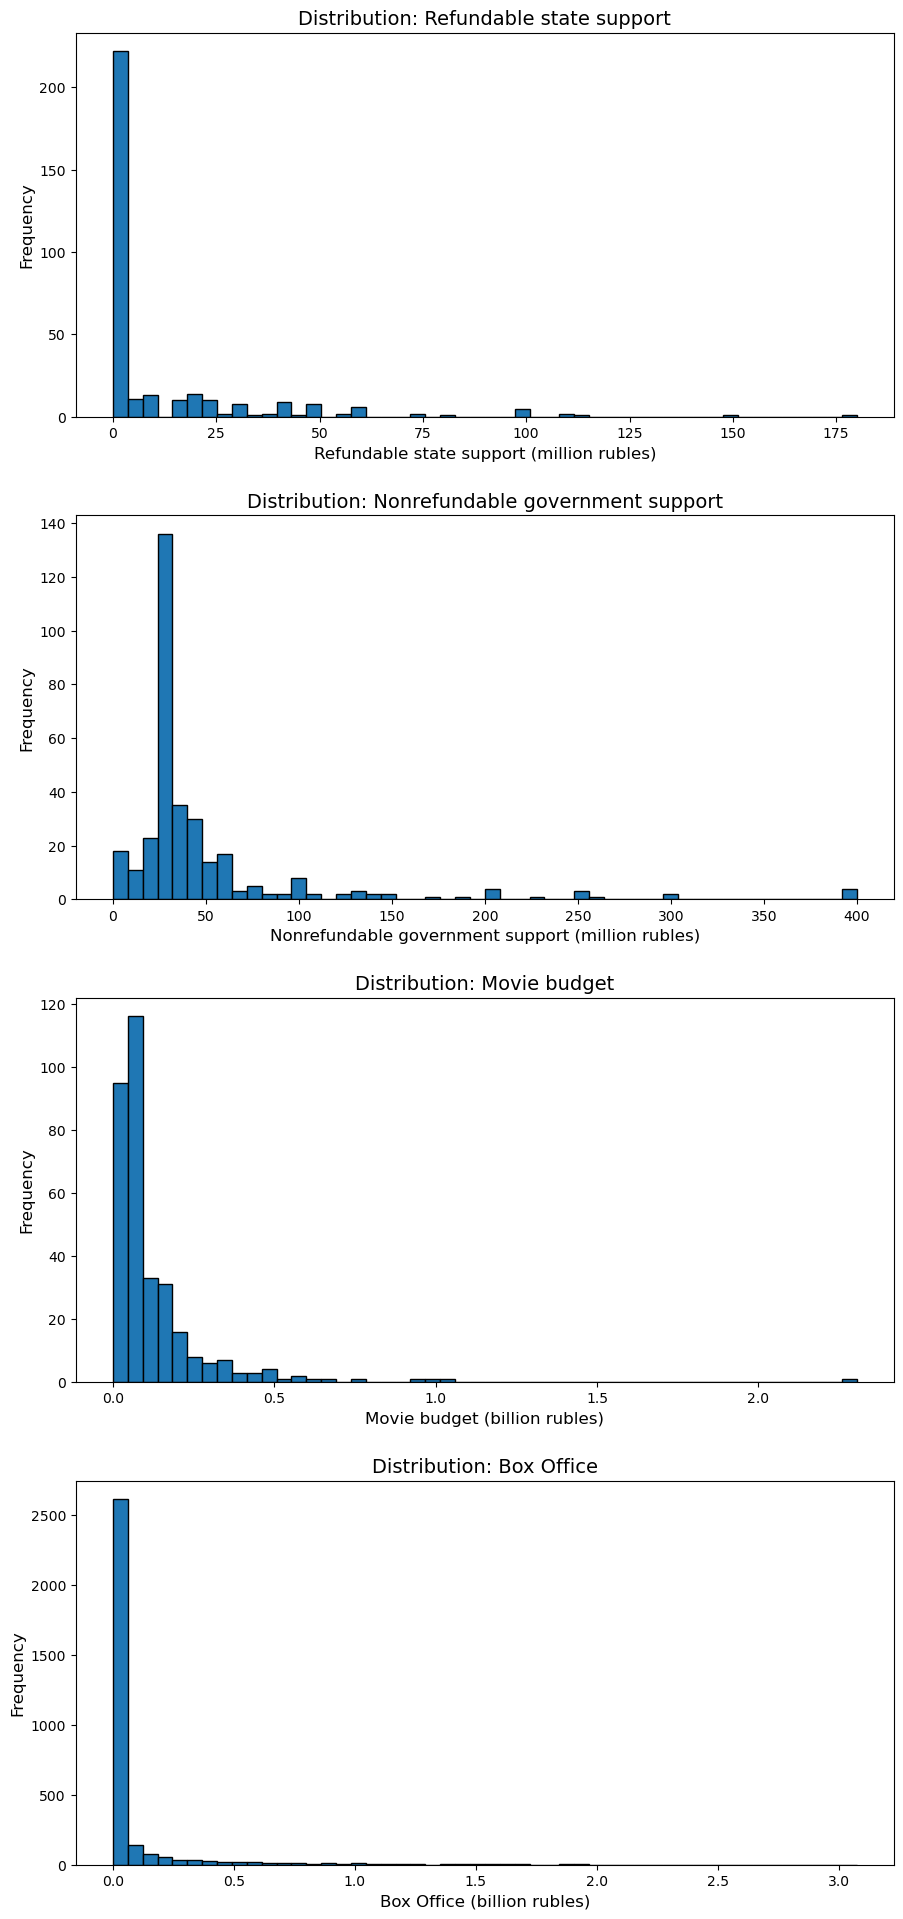

In [10]:
# Define Russian column names
column_names = {
    'refundable_support': 'Refundable state support',
    'nonrefundable_support': 'Nonrefundable government support',
    'budget': 'Movie budget',
    'box_office': 'Box Office',
    'ratings': 'Rating on MoviePoetry',
}

# Define units and scale
units = {
    'refundable_support': 'rubles',
    'nonrefundable_support': 'rubles',
    'budget': 'rubles',
    'box_office': 'rubles', 'box_office': 'rubles',
    'ratings': 'points',
}

scales = {}
for column in ['refundable_support', 'nonrefundable_support', 'budget', 'box_office']:
    if column in data.columns:
        max_value = data[column].max()
        if max_value >= 1e9:
            scales[column] = ('billion rubles', 1e9)
        elif max_value >= 1e6:
            scales[column] = ('million rubles', 1e6)
        else:
            scales[column] = ('rubles', 1)
    
# Select numeric columns
numeric_columns = data.select_dtypes(include=['number'])

# Number of plots
num_plots = len(numeric_columns.columns)

# Create plots
fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(10, 5 * num_plots))
fig.tight_layout(pad=5.0)

# Display histograms with labels
for ax, column in zip(axes, numeric_columns.columns):
    rus_name = column_names.get(column, column)  # Russian name
    unit, scale = scales.get(column, ('no units', 1))
    
    ax.hist(data[column] / scale, bins=50, edgecolor='black')
    ax.set_title(f'Distribution: {rus_name}', fontsize=14)
    ax.set_xlabel(f'{rus_name} ({unit})', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)

plt.show()



## First dataset outputs

## Table joins

- The `df_movies` and `df_shows` tables were successfully joined by the `puNumber` field using the **left join** method.
- All rows from `df_movies` are **saved** in the summary table `data`.
- Duplicates by `puNumber` are detected and processed: the first record from `df_movies` is retained, the rest are deleted.
- The final table `data` contains all the information from `df_movies`, supplemented by the collection data from `df_shows`.


## Missing Values

- **The most problematic columns:** `refundable_support`, `nonrefundable_support`, `budget`, `financing_source` are almost completely blank (over **95%** of values are missing).
  - **Conclusion:** Government support and budgets are only known for a small fraction of movies.
  - **Action:** You can either remove these columns or analyze only films with known budgets.

- **Other omissions:**
  - `producer` (missing **~7.6%** of data) - some movies may not have a producer listed.
  - `ratings` and `genres` - missing from **~13%** of movies.
  - `box_office` - missing for **~58%** of movies.
  - `film_studio`, `production_country`, `director` - **single omissions**.

---

## Basic Statistics (`describe()`)

### **Budget (`budget`):**
- **Average budget:** ~127 million rubles.
- **Median budget:** ~68 million rubles (less than average, indicating the presence of highly expensive films).
- **Maximum budget:** 2.3 billion rubles.
- **Min. value:** 0 (possibly movies with unknown budgets are recorded as `0` instead of `NaN`).

### **Cash receipts (`box_office`):**
- **Average collection:** ~76 million rubles.
- **Median collection:** ~2.3 million rubles (considerably less than the average, which indicates the presence of superhits with huge collections).
- **Maximum collection:** 3 billion rubles.
- **Min. value:** 0 (possibly unreleased films are recorded as `0` instead of `NaN`).

### **Government support (`refundable_support` and `nonrefundable_support`):**
- **Half of films received no support** (50% have `0`).
- **Maximum values:** R180 million and R400 million respectively, indicating significant investment for some films.

---

## Possible anomalies

- **Films with `budget = 0` or `box_office = 0`:**.
  - Could be **Data errors** or movies released immediately on digital platforms.

- **Some movies received public funding but have `budget = 0`:**
  - Could be a data error or the budget has been recalculated and not updated.

---

## Number of movies by category

- There are several types (`type`), but their composition is not yet known.
- **Age_restriction (`age_restriction`)** may provide information about which movies are more likely to collect box office.

# Data preprocessing

## Data type conversion in the dataset

| **Column**              | **Current type** | **New type**    | **Reason** | **Rationale** |
|-------------------------|---------------|----------------|------------|--------------|
| `show_start_date`       | `object`      | `datetime64`   | Dates should be stored in `datetime` format for easier sorting, filtering, and analysis. | |
| `puNumber`             | `object`      | `string` or `int64` | This is a rolling number; it's not used in calculations, but if it consists only of digits, it can be converted to `int64`. | |
| `ratings`              | `object`      | `float64`      | Ratings are numeric values, so they should be converted from strings to numbers. | |
| `box_office`           | `float64`     | `int64`        | Box office revenue is stored in rubles; `int64` will be more accurate if there are no fractional values. | |
| `age_restriction`      | `object`      | `category`     | Since the number of unique values is small, converting to `category` will optimize memory usage. | |
| `type`                | `object`      | `category`     | Movie types take a limited number of values, making `category` a suitable choice. | |
| `production_country`   | `object`      | `category`     | The number of unique countries is limited, reducing memory usage. | |
| `genres`              | `object`      | `string`       | Genres are stored as a list in some cases, so keeping them as `string` is the best option. | |


In [14]:
# Convert show_start_date to date format
data['show_start_date'] = pd.to_datetime(data['show_start_date'], errors='coerce')

# Translate ratings into numeric format
data['ratings'] = pd.to_numeric(data['ratings'], errors='coerce')

# Convert box_office to numeric format
data['box_office'] = pd.to_numeric(data['box_office'], errors='coerce')

# Convert age_restriction, type, production_country to categorical values
columns = ['age_restriction', 'type', 'production_country']

for column in columns:
    data[column] = data[column].astype('category')

In [15]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7486 non-null   object             
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   category           
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   category           
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   category           
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

## Pass processing

# **Processing Missing Values in the Dataset**

## **Categories and Methods of Handling Missing Values**

### **1. Columns with a Small Number of Missing Values (≤ 1%)**  
Replace gaps with meaningful values, as data loss is negligible.

| **Column**            | **% Missing**    | **Action**            | **Rationale** |
|-----------------------|-----------------|-----------------------|--------------|
| `film_studio`        | **0.2%** (18/7486) | `Unknown Studio`       | Unspecified but possibly known. |
| `production_country`  | **0.03%** (2/7486) | `Unknown Country`      | Country is important for analysis but not available. |
| `director`           | **0.1%** (9/7486)  | `Unknown Director`     | Director is important and omission can be indicated. |

---

### **2. Columns with a Moderate Number of Missing Values (~10%)**  
Fill with meaningful values or leave `NaN`.

| **Column**  | **% Missing**    | **Action**           | **Reason** |
|------------|-----------------|----------------------|------------|
| `producer` | **7.6%** (568/7486)  | `Unknown Producer`   | Some movies don't have a producer. |
| `ratings`  | **13.3%** (996/7486)  | `NaN`                | Can leave as `NaN`, may need to be filled later. |
| `genres`   | **13%** (976/7486)   | `Unknown Genre`      | Genre is important, but if not specified, leave as `Unknown`. |

---

### **3. Columns with Critical Missing Values (≥ 50%)**  
Here, missing values indicate the absence of data. Fill with `0` where it makes sense.

| **Column**               | **% Missing**      | **Action**                 | **Rationale** |
|-------------------------|------------------|--------------------------|--------------|
| `refundable_support`    | **95.5%** (7154/7486) | `0`                       | Only 332 movies received financial support. |
| `nonrefundable_support` | **95.5%** (7154/7486) | `0`                       | If there is no data, there was likely no support. |
| `budget`               | **95.5%** (7154/7486) | `0`                       | Budget is only provided for supported films. |
| `financing_source`      | **95.5%** (7154/7486) | `No source of funding`     | If no data is available, funding may not exist. |
| `box_office`           | **58.1%** (4328/7486) | `0`                       | Films without box office data were likely not released theatrically. |


In [18]:
# Dictionary of values to fill NaN in row columns
fill_values = {
    'film_studio': 'Unknown Studio',
    'director': 'Unknown Director',
    'producer': 'Unknown Producer',
    'genres': 'Unknown Genre'
}

# Fill gaps in string columns
data.fillna(fill_values, inplace=True)

# Process the production_country categorical column
data['production_country'] = data['production_country'].cat.add_categories('Unknown Country').fillna('Unknown Country')

# Fill in the gaps in the numeric columns with zeros
num_cols = ['refundable_support', 'nonrefundable_support', 'budget', 'box_office']
data[num_cols] = data[num_cols].fillna(0)
data['funding_source'] = data['financing_source'].fillna('No source of funding')
data['title'] = data['title'].str.replace('_', '')
# Check the number of skips
print(data.isna().sum())


title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                 0
production_country          0
director                    0
producer                    0
age_restriction             0
refundable_support          0
nonrefundable_support       0
budget                      0
financing_source         7154
ratings                   996
genres                      0
box_office                  0
funding_source              0
dtype: int64


# Duplicate processing

In [20]:
data.duplicated().sum()

np.int64(0)

In [21]:
# Check for implicit duplicates
# Bring all lowercase columns to lowercase
Columns = ['title', 'type', 'film_studio', 'production_country', 'director', 'producer', 'genres']
data[columns] = data[columns].apply(lambda x: x.str.lower())

# Remove extra spaces if there are any
data[columns] = data[columns].apply(lambda x: x.str.strip())

In [22]:
# Check the number of occurrences

for column in columns:
    print(data[column].value_counts())
data['age_restriction'].value_counts()

age_restriction
«16+» - для детей старше 16 лет           2851
«18+» - запрещено для детей               1605
«12+» - для детей старше 12 лет           1593
«0+» - для любой зрительской аудитории     811
«6+» - для детей старше 6 лет              626
Name: count, dtype: int64
type
художественный                5909
анимационный                   829
прочие                         406
документальный                 288
научно-популярный               53
музыкально-развлекательный       1
Name: count, dtype: int64
production_country
сша                                     2175
россия                                  1821
ссср                                     377
франция                                  302
великобритания                           259
                                        ... 
италия, испания                            1
испания - германия - нидерланды            1
бразилия - сша - кнр                       1
великобритания, германия, дания, сша       1
2019         

age_restriction
«16+» - для детей старше 16 лет           2851
«18+» - запрещено для детей               1605
«12+» - для детей старше 12 лет           1593
«0+» - для любой зрительской аудитории     811
«6+» - для детей старше 6 лет              626
Name: count, dtype: int64

In [23]:
# Check for implicit (incomplete) duplicates by puNumber and title
# Check for full duplicates
full_duplicates = data.duplicated().sum()

# Check duplicates by title
title_duplicates = data.duplicated(subset=['title']).sum()

# Check for duplicates by puNumber
pu_duplicates = data.duplicated(subset=['puNumber']).sum()

# Output the result
print(f"Number of complete duplicates - {full_duplicates}")
print(f"Number of title duplicates - {title_duplicates}")
print(f"Number of duplicates by puNumber - {pu_duplicates}")



Number of complete duplicates - 0
Number of title duplicates - 728
Number of duplicates by puNumber - 2


## Conclusions by row and categorical columns

## **1. Movie titles (`title`)**
- There are **repeated movie titles**, e.g., `“valentine's day_” (5 times)`, `“dream house” (4 times)`, `“snow white and the hunter” (4 times)`.
- Possible **duplicates due to extra spaces or characters** (e.g., `“valentine's day_”` may be a duplicate of `“valentine's day”`).

---

## **2. Movie type (`type`)**
- The ``fiction`` category dominates (**5909 entries out of 7486**, or 79%).
- The category `“musical-entertainment”` occurs **only 1 time**, making it of little importance.
- The presence of **rare categories** can make it difficult to analyze.

---

## **3. Studio (`film_studio`)**
- **Very high uniqueness** of values (**5423 studios for 7486 movies**).
- **Different spelling formats** (e.g. ``Mosfilm Studios'`` vs ``Mult in Cinema LLC'``).
- Possible **Misspellings or duplicates** due to extra characters.

---

## **4. Country of production (`production_country`)**
- **Incorrect values** (e.g., `“2019”` in the country list).
- **Different delimiters** in multi-compound countries (``Spain-Germany-Netherlands'`` vs ``Spain, Germany, Netherlands'``).
- **Many unique values** (**934 countries for 7486 movies**), which may include duplicates and inaccuracies.

---

## **5. Director (`director')**
- **Some directors occur very frequently**, e.g. ``O.Semyonova'`` (60 times).
- **Mixing of name formats** (``O.Semyonova'`` vs ``Kevin Costner'``).
- Possible **duplicates** due to different spellings (`“s.selyanov”` vs `“sergei selyanov”`).

---

## **6. Producer (`producer`) **.
- Many **rare values** (**5327 unique producers**).
- **Unconsistent entries** (e.g. ``d.loveyko, o.kuzovkov'`` vs ``Oleg kuzovkovovkov, dmitri loveyko, marina ratina'``).
- Possible **implicit duplicates** due to different formatting of full names.

---

## **7. Genres (`genres`)**
- **Many rare genre combinations** (**743 unique values**).
- Different genre entry formats (``drama, military, thriller'`` vs ``military, drama, thriller'``).
- The **category ``unknown genre'`` (976 entries, 13%)** is present, which may affect the analysis.

---

## **8. Age Restriction (`age_restriction`)**
- **Predominance of age categories `16+`, `18+`, `12+`**.
- Entries contain **useless quotation marks and description** (e.g. ``18+'' - prohibited for children`'), which may complicate data processing.

---

# **Problem in categorical data**

A common problem with categorical data can be that **one field contains multiple values** at once, making it difficult to analyze. This is especially true for columns:

- **`genres`** - one movie can belong to multiple genres (**drama, military, thriller*).
- **`production_country`** - one country can be part of a co-production (*France, Germany, Netherlands*).
- **`film_studio`** - a movie can have multiple studios (*Pixar, Disney*).
- **`producer`** - several producers are listed in one line (*Oleg Kuzovkov, Dmitry Loveyko*).

This feature complicates data grouping, graphing and aggregation, so it may be necessary to split such columns into separate values when analyzing them.



# **General problems in the data**
1. **Duplicates and discrepancies** in movie titles, studios, producers, and directors.
2. **Incorrect or unusual values** (e.g., `“2019”` in `production_country`).
3. **Different recording formats** (different delimiters, spaces, registers).
4. **Rare categories in `type` and `genres`** that may be of little significance.
5. **Unsuperfluous descriptions in `age_restriction`** that complicate analysis.

These problems can lead to inaccuracies in data analysis



In [25]:
# Let's fix the problematic values in the type field
data['type'] = data['type'].replace('музыкально-развлекательный', 'прочие')

In [26]:
data['type'].value_counts()

type
художественный       5909
анимационный          829
прочие                407
документальный        288
научно-популярный      53
Name: count, dtype: int64

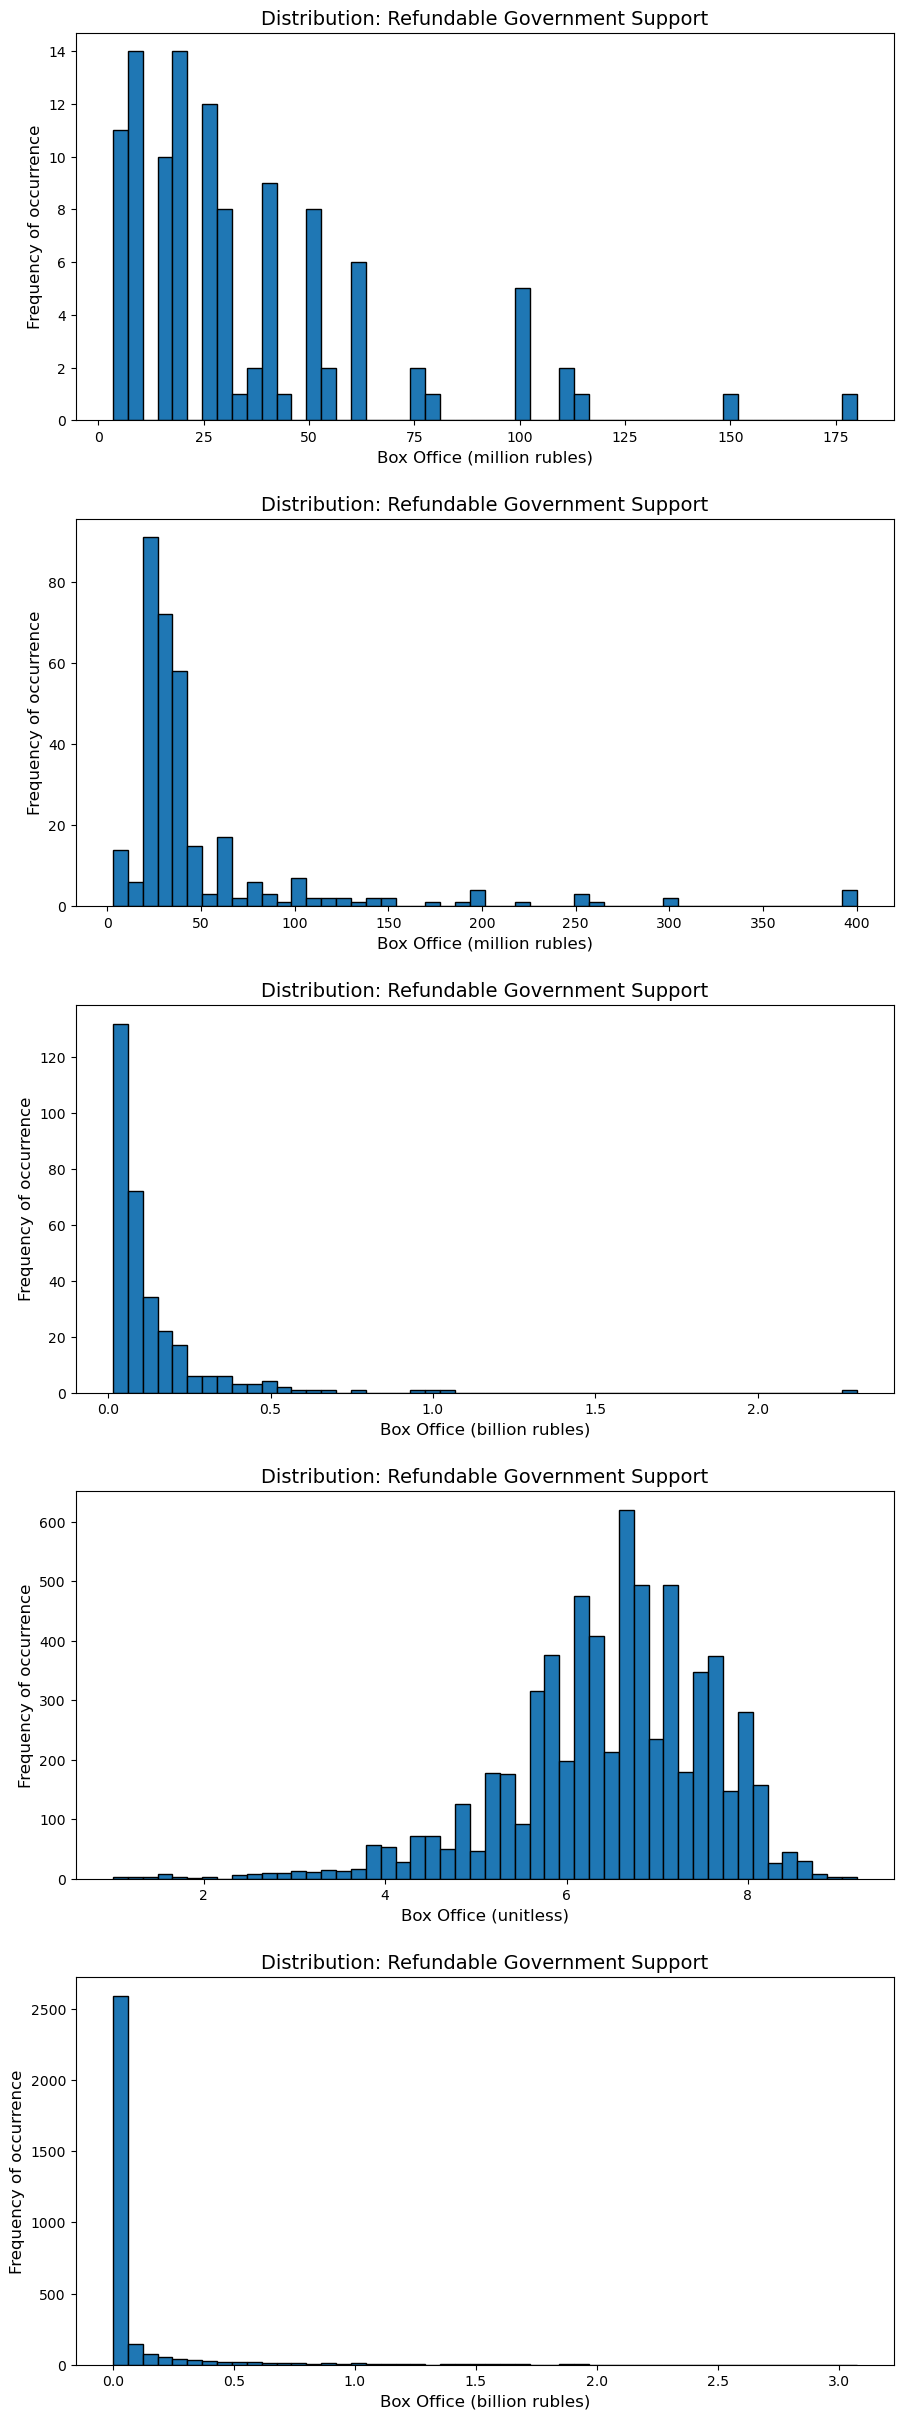

In [27]:
# Defining Russian column names
column_names = {
    'refundable_support': 'Возвратная господдержка',
    'nonrefundable_support': 'Невозвратная господдержка',
    'budget': 'Бюджет фильма',
    'box_office': 'Кассовые сборы',
    'ratings': 'Рейтинг на КиноПоиске',
}

# Definition of units of measurement and scale
units = {
    'refundable_support': 'рубли',
    'nonrefundable_support': 'рубли',
    'budget': 'рубли',
    'box_office': 'рубли',
    'ratings': 'баллы',
}

scales = {}
for column in ['refundable_support', 'nonrefundable_support', 'budget', 'box_office']:
    if column in data.columns:
        max_value = data[column].max()
        if max_value >= 1e9:
            scales[column] = ('billion rubles', 1e9)
        elif max_value >= 1e6:
            scales[column] = ('million rubles', 1e6)
        else:
            scales[column] = ('rubles', 1)
    
# Selecting numeric columns
numeric_columns = data.select_dtypes(include=['number'])

# Exclude zero values
numeric_columns_no_zeros = numeric_columns.apply(lambda x: x[x != 0])

# Number of charts
num_plots = len(numeric_columns_no_zeros.columns)

# Creating graphs
fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(10, 5 * num_plots))
fig.tight_layout(pad=5.0)

# Displaying histograms with captions
for ax, column in zip(axes, numeric_columns_no_zeros.columns):
    unit, scale = scales.get(column, ('unitless', 1))
    ax.hist(numeric_columns_no_zeros[column] / scale, bins=50, edgecolor='black')
    ax.set_title(f'Distribution: Refundable Government Support', fontsize=14)
    ax.set_xlabel(f'{rus_name} ({unit})', fontsize=12)
    ax.set_ylabel('Frequency of occurrence', fontsize=12)

plt.show()

In [28]:
# Let's find films that have a budget less than the amount of state support
anomalies = data[data['budget'] < (data['refundable_support'] + data['nonrefundable_support'])]

# Let's see the results
print(f'Number of abnormal movies: {len(anomalies)}')
print(anomalies[['title', 'budget', 'refundable_support', 'nonrefundable_support']])


Number of abnormal movies: 17
                       title  budget  refundable_support  \
2053                     14+     0.0                 0.0   
2058               Дуxless 2     0.0                 0.0   
2472             Воин (2015)     0.0          10000000.0   
2532                 Бармен.     0.0          20000000.0   
2615     Савва. Сердце воина     0.0          60000000.0   
2684          Тряпичный союз     0.0                 0.0   
2788      Срочно выйду замуж     0.0                 0.0   
2874       Помню - не помню!     0.0                 0.0   
3047  Любовь с ограничениями     0.0          19000000.0   
3565       Притяжение (2016)     0.0                 0.0   
3675                Чудо-юдо     0.0          20000000.0   
3739                    Мифы     0.0          25000000.0   
5673                   Селфи     0.0          20000000.0   
5806              Два хвоста     0.0          10000000.0   
6008      Принцесса и дракон     0.0          40000000.0   
6323      

## **Findings from the analysis of the numerical data**

## **1. `refundable_support` and `nonrefundable_support` (government support)**
### **Findings:**
- Most films received **nonrefundable amounts of government support**.
- There are **anomalously large values** of subsidies creating outliers.
- The distribution is **asymmetric**, with a long tail on the right.

### **Problems:**
- **Emissions**: a small group of films received **extremely large amounts** of support.
- **Distribution Gap**: there are films with close to zero funding and films with huge subsidies.


---

## **2. `budget' (movie budget)**
### **Findings:**.
- Most movies have a **moderate budget**, but there are rare movies with **huge budgets**.
- The distribution is **very skewed to the left**: many films with budgets **under 500 million**, but few with **budgets above 1 billion**.

### **Problems:**
- **Budgets**: abnormally large budgets and a gap between low-budget and blockbusters.
- **Grouping of films**: **Low-budget, mid-budget and high-budget projects** can be distinguished.


---

## **3. `ratings`.
### **Findings:**
- **The distribution is similar to normal**, but with a slight bias to the left.
- Most movies have **ratings of 5-7**.
- Few films are rated **below 3**.

### **Problems:**
- **Low ratings** for some movies - possibly poor quality projects.
- **No clear link between ratings and budget**.


---

## **4. `box_office' (box office receipts)** **
### **Findings:**
- **Most of the movies collected a small box office**, but there are some super hits.
- **Shift to the left**: an overwhelming number of films **have significantly lower box office collections than the market leaders**.
- There is a clear group of **blockbusters** with high box office returns.

### **Problems:**
- **Collections**: a small group of films have collected **1-3 billion rubles**, creating an imbalance.
- **Collection gap**: films are divided into **common and superhits**, which needs to be analyzed.


---

# **Common Issues in the Data**
1. **Outliers** in budgets, government support, and box office revenue → it is worth grouping films by funding type.  
2. **Strong left-skewed distributions** → it might be useful to apply **logarithmic transformation (`log1p`)**.  
3. **Data imbalance** → movies with **high budgets are not always successful at the box office**.  

### Checking the Consistency of Budget and Government Support  

The total amount of government support (`refundable_support + nonrefundable_support`) should not exceed the total `budget`.  
However, the check revealed **17 anomalous films** where the **budget is 0**, yet a significant amount of government support is recorded.  

#### **Possible Causes of Anomalies:**  
- Data entry error (`budget` may have been incorrectly recorded or lost during processing).  
- The `budget` may not include the film’s own funds, only government contributions.  
- Error in data merging or handling missing values.  

#### **Examples of Anomalous Films:**  
- *Warrior (2015)* — budget `0`, but received **10M RUB refundable and 70M RUB non-refundable** support.  
- *Savva: The Heart of a Warrior* — budget `0`, but **60M RUB refundable and 100M RUB non-refundable** support.  
- *Attraction (2016)* — budget `0`, but **250M RUB non-refundable** support.  

These anomalies may affect the analysis, so it is advisable to **verify the data source**.  



---
# Adding New Columns  
- Create a column with information about the release year by extracting the year from the movie's premiere date.  
- Create two columns: one for the **first name and last name of the main director** and another for the **primary genre** of the film. These columns will contain the first values from the list of directors and genres, respectively.  
- Calculate the **share of government support in the total movie budget**.  


In [31]:
# Create a column with the release year by extracting the year from the movie's premiere date
data['year_show'] = data['show_start_date'].dt.year

In [32]:
# Create a column with the first name and last name of the main director
# Create a column with the primary genre of the film
data['main_director'] = data['director'].str.split(',').str[0]
data['main_genre'] = data['genres'].str.split(',').str[0]

In [33]:
# Calculate the share of government support in the total movie budget
data['gov_sup'] = ((data['refundable_support'] + data['nonrefundable_support']) / data['budget']).round(2)

# Data Preprocessing Summary

## 1. Duplicate Checking and Handling
- **No explicit duplicates** were found in the dataset.
- **No implicit duplicates** (differences in case, spaces, punctuation) were detected, but discrepancies may exist in `title`, `film_studio`, `director`, and `producer`.
- **Issue with multi-valued categories** — columns such as `genres`, `production_country`, `film_studio`, and `producer` contain multiple values in a single cell.

## 2. Missing Value Handling
- **Rows with minor missing values** (`film_studio`, `production_country`, `director`, `producer`, `genres`) were filled with `"Unknown"`.
- **Missing values in budget-related columns** (`refundable_support`, `nonrefundable_support`, `budget`, `box_office`) were replaced with `0`.
- **Categorical missing values in `financing_source`** were replaced with `"No source of funding"`.
- **Missing values in `ratings` were left unchanged**, as filling them could distort the distribution.

## 3. Anomaly Checking
- **17 movies were identified** where `budget = 0`, but significant government support is recorded.
- **Checked consistency between `budget` and government funding** — no cases were found where the budget was **less than the total government support**, except for movies with `budget = 0`.

## 4. Categorical Data Analysis
- **Movie titles (`title`) contain duplicates** with variations in characters (`_`, spaces).
- **Inconsistencies in `film_studio`, `director`, and `producer`** due to different formatting styles (abbreviations, different name orders).
- **`production_country` uses different delimiters** (`-` and `,`), making analysis more difficult.
- **Genres (`genres`) require normalization** — word order varies (`drama, war, thriller` vs. `war, drama, thriller`).

## 5. Numeric Data Processing
- **Outliers were found** in `budget`, `box_office`, and `ratings`.
- **Distributions are strongly left-skewed**, suggesting a possible need for logarithmic transformation (`log1p`).
- **Grouping movies** into low-budget, mid-budget, and blockbusters could be useful for analysis.

## 6. Added Columns
- **Extracted release year (`year_show`)** from `show_start_date`.
- **Created `main_director` and `main_genre`** for easier analysis.
- **Calculated the share of government support (`gov_sup`)** in the total movie budget.

### **General Conclusion**
The dataset requires **categorical variable normalization, handling of multi-valued fields** (`genres`, `production_country`), and **removal of anomalies in `budget`**. Before further analysis, **outliers should be considered**, and the **movie funding structure should be refined**.


# Exploratory Data Analysis  
- Analyze the number of movies released each year.  
- Note that box office data is not available for all movies.  
- Calculate the share of movies with available box office information.  
- Examine how this share has changed over the years.  
- Determine which period is most comprehensively represented in the dataset.  
- Analyze how the box office revenue has changed over the years. In which year was the total revenue the lowest? The highest?  
- Use a pivot table to calculate the **average and median** box office revenue for each year. Compare the values and draw conclusions.  
- Determine whether **age restrictions** ("6+", "12+", "16+", "18+", etc.) affect a movie’s box office performance between 2015 and 2019.  
- Identify which age rating category generated the highest revenue.  
- Examine whether the trends vary by year. If so, hypothesize potential reasons for these changes.  


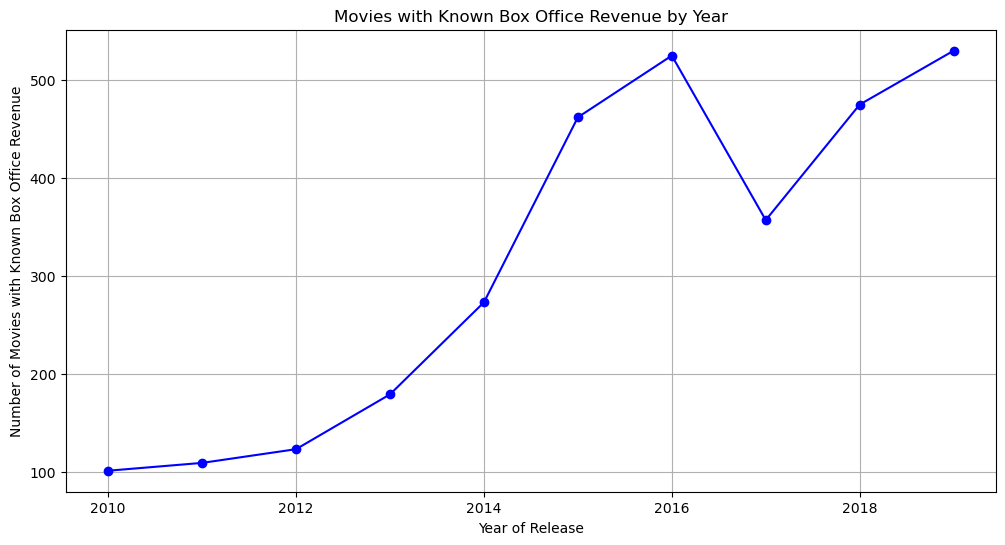

In [36]:
# Analyze the number of movies released in theaters each year.
yearly_box_office = data[data['box_office'] > 0].groupby('year_show')['title'].count()

plt.figure(figsize=(12, 6))
plt.plot(yearly_box_office.index, yearly_box_office.values, marker='o', linestyle='-', color='b')

plt.xlabel("Year of Release")
plt.ylabel("Number of Movies with Known Box Office Revenue")
plt.title("Movies with Known Box Office Revenue by Year")
plt.grid(True)

plt.show()



In [37]:
# Share of movies with zero box office revenue
zero_box_office_ratio = (data['box_office'] == 0).sum() / len(data)
print(f"Share of movies without box office data (zero revenue): {zero_box_office_ratio:.2%}")

# Share of movies with reported box office revenue
non_zero_box_office_ratio = (data['box_office'] > 0).sum() / len(data)
print(f"Share of movies with reported box office revenue: {non_zero_box_office_ratio:.2%}")


Share of movies without box office data (zero revenue): 58.14%
Share of movies with reported box office revenue: 41.86%


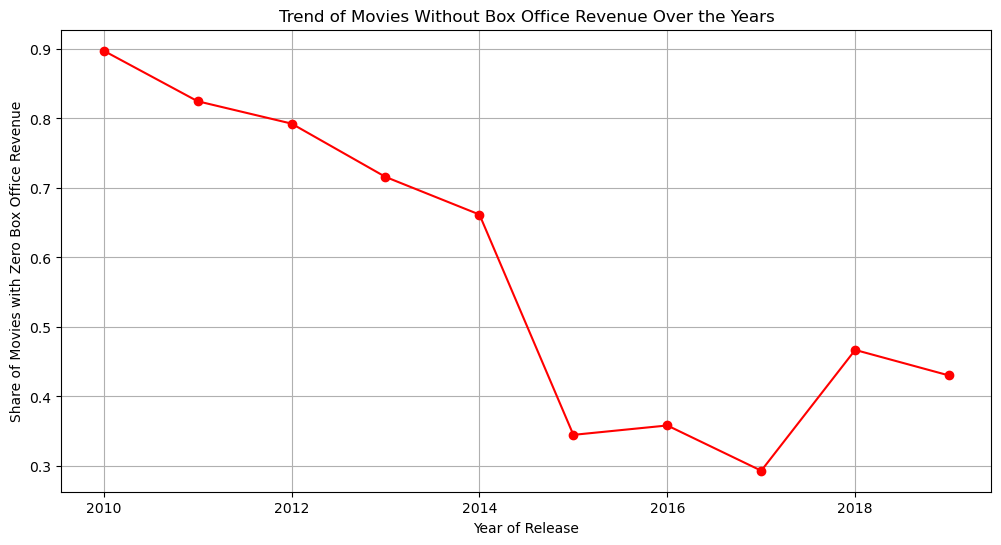

In [38]:
# Total number of movies per year
yearly_total = data.groupby('year_show')['title'].count()

# Number of movies with zero box office revenue per year
yearly_zero_box_office = data[data['box_office'] == 0].groupby('year_show')['title'].count()

# Share of movies with zero box office revenue per year
yearly_zero_ratio = (yearly_zero_box_office / yearly_total).fillna(0)

# Plot the graph
plt.figure(figsize=(12, 6))
plt.plot(yearly_zero_ratio.index, yearly_zero_ratio.values, marker='o', linestyle='-', color='r')

# Graph formatting
plt.xlabel("Year of Release")
plt.ylabel("Share of Movies with Zero Box Office Revenue")
plt.title("Trend of Movies Without Box Office Revenue Over the Years")
plt.grid(True)

plt.show()


In [39]:
# Determine which period is most comprehensively represented in the dataset
max_show_year = data.groupby('year_show')['title'].count()
max_year = max_show_year.idxmax()
max_value = max_show_year.max()

print(f"Most represented year: {max_year} ({max_value} movies)")


Most represented year: 2010 (985 movies)


year_show
2010    0.102538
2011    0.175241
2012    0.207420
2013    0.284127
2014    0.338290
Name: title, dtype: float64


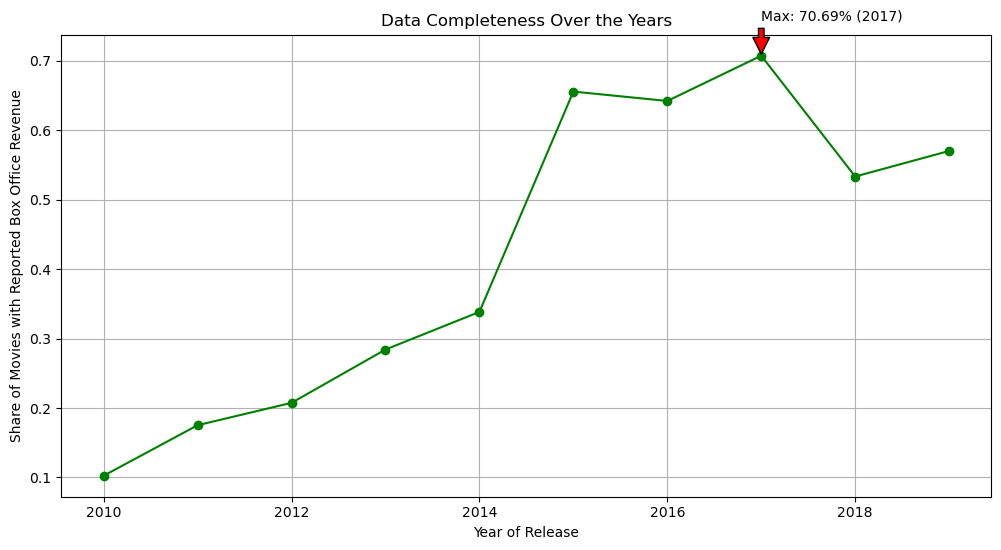

In [40]:
# Calculate the total number of movies per year
max_show_year = data.groupby('year_show')['title'].count()

# Calculate the number of movies with non-zero box office revenue per year
yearly_filled_data = data[data['box_office'] > 0].groupby('year_show')['title'].count()

# Compute the share of movies with reported box office revenue per year
yearly_ratio = (yearly_filled_data / max_show_year).fillna(0)

# Check the data
print(yearly_ratio.head())

# Plot the graph
plt.figure(figsize=(12, 6))
plt.plot(yearly_ratio.index, yearly_ratio.values, marker='o', linestyle='-', color='g')

# Annotate the best year (the year with the highest share of reported box office data)
best_year = yearly_ratio.idxmax()
best_ratio = yearly_ratio.max()
plt.annotate(f"Max: {best_ratio:.2%} ({best_year})", 
             xy=(best_year, best_ratio), 
             xytext=(best_year, best_ratio + 0.05), 
             arrowprops=dict(facecolor='red', shrink=0.05))

# Graph formatting
plt.xlabel("Year of Release")
plt.ylabel("Share of Movies with Reported Box Office Revenue")
plt.title("Data Completeness Over the Years")
plt.grid(True)

plt.show()


In [41]:
# Analyze how box office revenue has changed over the years. 
# Determine the years with the highest and lowest total revenue.

sum_office = data.groupby('year_show')['box_office'].sum()
pd.options.display.float_format = '{:,.2f}'.format  # Format numbers with two decimal places

max_sum_year = sum_office.idxmax()
max_sum_value = sum_office.max()
print(f'The highest total box office revenue, {max_sum_value} RUB, was recorded in {max_sum_year}.')

min_sum_year = sum_office.idxmin()
min_sum_value = sum_office.min()
print(f'The lowest total box office revenue, {min_sum_value} RUB, was recorded in {min_sum_year}.')

sum_office


The highest total box office revenue, 49668403134.32 RUB, was recorded in 2018.
The lowest total box office revenue, 2428654.0 RUB, was recorded in 2010.


year_show
2010        2,428,654.00
2011       14,102,765.00
2012        6,955,423.00
2013       29,799,706.20
2014    7,444,951,859.20
2015   39,497,365,196.40
2016   47,866,299,741.91
2017   48,563,707,217.51
2018   49,668,403,134.32
2019   48,425,708,779.59
Name: box_office, dtype: float64

                   mean       median
             box_office   box_office
year_show                           
2010           2,465.64         0.00
2011          22,673.26         0.00
2012          11,729.21         0.00
2013          47,301.12         0.00
2014       9,225,466.99         0.00
2015      56,024,631.48   739,938.00
2016      58,516,258.85   479,832.50
2017      96,165,756.87 2,522,174.00
2018      55,744,560.20   289,040.00
2019      52,070,654.60   597,710.00


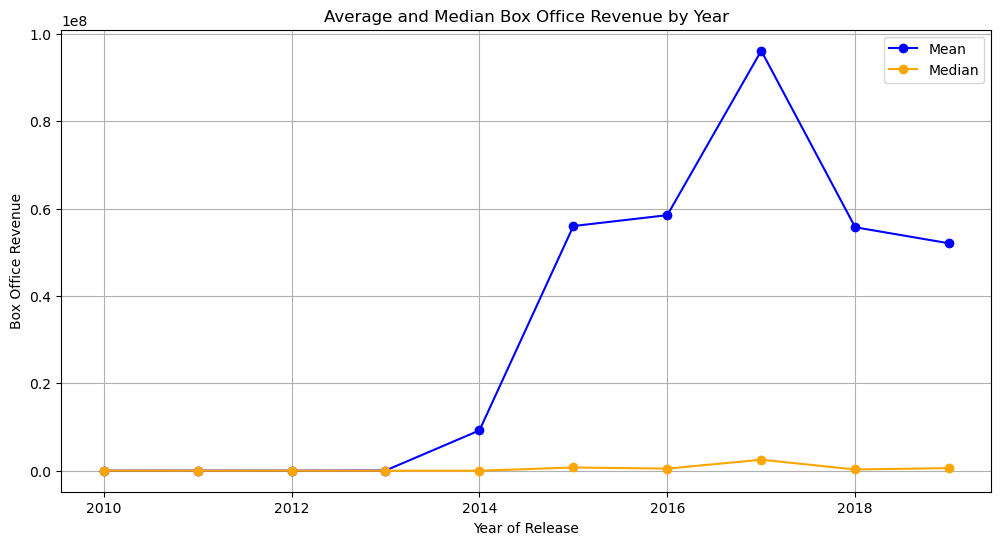

In [42]:
# Use a pivot table to calculate the average and median box office revenue for each year.
# Compare the values and draw conclusions.

pivot_office = data.pivot_table(
    index='year_show',
    values='box_office',
    aggfunc=['mean', 'median']
)
print(pivot_office)

# Plot line graphs
plt.figure(figsize=(12, 6))
plt.plot(pivot_office.index, pivot_office['mean'], marker='o', linestyle='-', color='blue', label="Mean")
plt.plot(pivot_office.index, pivot_office['median'], marker='o', linestyle='-', color='orange', label="Median")

# Formatting
plt.xlabel("Year of Release")
plt.ylabel("Box Office Revenue")
plt.title("Average and Median Box Office Revenue by Year")
plt.legend()
plt.grid(True)

# Show the graph
plt.show()


## **Conclusions on Average (`mean`) and Median (`median`) Box Office Revenue by Year**

### **1. Significant Difference Between Mean and Median**
- In all years, the average revenue is significantly higher than the median, especially from 2014 to 2019.
- This indicates the presence of outlier films with extremely high earnings, which distort the mean value.
- For example, in 2017:
  - **Mean**: 96 million RUB
  - **Median**: 2.5 million RUB  
  This means that most films earned 2.5 million RUB or less, but a few blockbusters generated exceptionally high revenues.

### **2. Box Office Growth Since 2014**
- **2014 — A Turning Point for Growth**: The average revenue increased drastically (from 47K to 9.2 million RUB).
- **2015–2017 — Period of Maximum Growth**: Box office revenue kept rising, but a decline started in 2018–2019.
- **2017 — Peak Year for Average Revenue** (96 million RUB).

### **3. Improvement in Data Quality**
- **2010–2014:** Median = 0 → Most films lack box office data.
- **2015–2019:** Median is greater than 0 → Data became more complete, but the mean remains significantly higher than the median due to a few high-grossing films.

### **4. Possible Reasons for Box Office Growth**
- Improved collection of box office data since 2015.
- Expansion of cinema distribution and increasing popularity of domestic films.
- The emergence of major blockbusters that contributed a significant portion of total revenue.

### **5. Summary**
- **2010–2014** — Data is incomplete, with no box office information for most films.
- **2015–2019** — More data is available, but the mean remains much higher than the median, indicating the dominance of a few high-grossing films.
- **2017 — The Record Year for Average Revenue**, but the median is **38 times lower**, meaning that a small number of blockbusters generated the majority of box office earnings.
- **After 2017, box office revenue started declining**, possibly due to economic crises or market saturation.
- Additionally, data incompleteness should be considered, especially in the first four years.


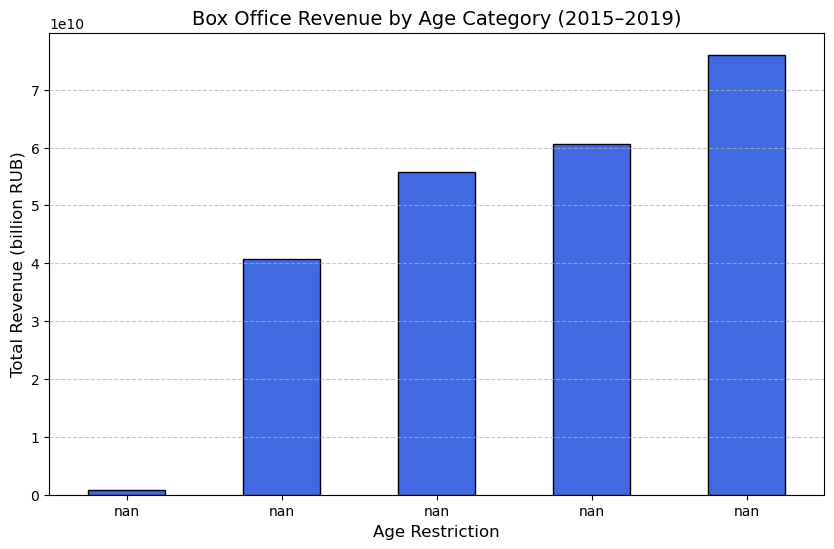

age_restriction
NaN      809,077,425.97
NaN   60,619,446,628.33
NaN   76,034,733,643.63
NaN   40,759,615,572.12
NaN   55,798,610,799.68
Name: box_office, dtype: float64

In [44]:
# Determine whether audience age restrictions ("6+", "12+", "16+", "18+", etc.) 
# affect a movie’s box office performance from 2015 to 2019.

# Filter data for the years 2015–2019
five_years = data[(data['year_show'] >= 2015) & (data['year_show'] <= 2019)]

# Group by age restriction and calculate total box office revenue
age_rest = five_years.groupby('age_restriction', observed=True)['box_office'].sum()

# Dictionary to replace long labels with short ones
short_labels = {
    "«0+» - for all audiences": "0+",
    "«6+» - for children over 6 years old": "6+",
    "«12+» - for children over 12 years old": "12+",
    "«16+» - for children over 16 years old": "16+",
    "«18+» - prohibited for children": "18+"
}

# Apply shortened labels
age_rest.index = age_rest.index.map(short_labels)

# Create a bar chart
plt.figure(figsize=(10, 6))
age_rest.sort_values().plot(kind='bar', color='royalblue', edgecolor='black')

# Format the chart
plt.title("Box Office Revenue by Age Category (2015–2019)", fontsize=14)
plt.xlabel("Age Restriction", fontsize=12)
plt.ylabel("Total Revenue (billion RUB)", fontsize=12)

# Adjust font size and rotate X-axis labels
plt.xticks(rotation=0, fontsize=10)

# Add a grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

age_rest


# **Interim Conclusion on the Impact of Age Ratings on Box Office Revenue**

## **Objective and Tasks**
- Determine whether age restrictions (`0+`, `6+`, `12+`, `16+`, `18+`) affect movie box office revenue.
- Analyze box office earnings for the period **2015–2019**.
- Identify possible trends and anomalies.

---

## **Key Findings**
1. **Movies rated `16+` had the highest revenue (76 billion RUB), followed by `12+` (60 billion RUB).**
2. **The lowest revenue was for `0+` films** — only **0.8 billion RUB**.
3. **Movies rated `6+` and `18+` had similar earnings** (~55–40 billion RUB), suggesting similar popularity among these age groups.
4. **The `16+` category leads in revenue**, likely due to high popularity among teenagers and young adults.

---

## **Analysis and Conclusions**
- **There is no clear correlation between age rating and revenue**, but some trends can be observed:
  - **Family-oriented films (`6+`, `12+`) perform well but fall behind `16+`.**
  - **Movies rated `18+` earn less**, possibly due to audience restrictions.
  - **`0+` films are barely represented in theaters**, which explains their low revenue.

---

## **Potential Issues and Limitations**
1. **Other influencing factors are not considered** (budget, genre, marketing, competition).
2. **Possible misclassification of ratings** — some films may have been assigned a lower rating for broader distribution.
3. **The number of films per category is not accounted for** — higher revenue may be due to a larger number of releases rather than the age rating itself.

---

## **Recommendations and Next Steps**
✔ **Check the number of films in each age category** to determine which are the most profitable on average.  
✔ **Analyze average revenue per film** for more precise conclusions.  
✔ **Consider the impact of genre and budget** on box office revenue to get a complete picture.  

🚀 **Conclusion:** Age rating **is not the primary factor** determining revenue, but it may influence audience reach and movie success depending on other parameters.


---
# Analysis of Government-Supported Films  

- How do government-funded films perform financially? (Compare budget and box office revenue)  
- What ratings do these films receive? (Quality vs. profitability)  
- Which genres most frequently receive funding?  
- Which government-supported films were the most successful and which were the biggest failures?  


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7486 non-null   object             
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7486 non-null   object             
 5   production_country     7486 non-null   object             
 6   director               7486 non-null   object             
 7   producer               7486 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     7486 non-null   float64            
 10  nonrefundable_support  7486 non-null   float64            
 11  budget                 7486 non-null   float64          

In [48]:
# Total amount of government funding
total_funding = data[data['budget'] > 0]['budget'].sum()
print(f"Total amount of government funding: {total_funding:,.2f} RUB")

Total amount of government funding: 42,240,265,939.00 RUB


In [49]:
# How profitable are government-funded films?
gov_funded = data[data['budget'] > 0].copy()
gov_funded['profitability'] = gov_funded['box_office'] / gov_funded['budget']
avg_profitability = gov_funded['profitability'].mean()

print(f"Average profitability of government-funded films: {avg_profitability:.2f}")


Average profitability of government-funded films: 0.73


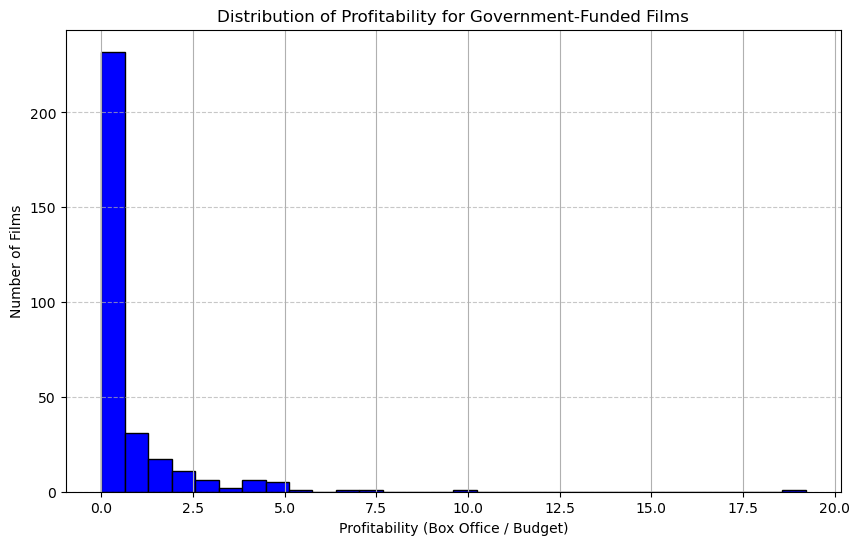

In [50]:
plt.figure(figsize=(10, 6))
gov_funded['profitability'].hist(bins=30, color='blue', edgecolor='black')

plt.xlabel("Profitability (Box Office / Budget)")
plt.ylabel("Number of Films")
plt.title("Distribution of Profitability for Government-Funded Films")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [51]:
# Average rating
avg_rating = gov_funded['ratings'].mean()
print(f"Average rating of government-funded films: {avg_rating:.2f}")



Average rating of government-funded films: 6.02


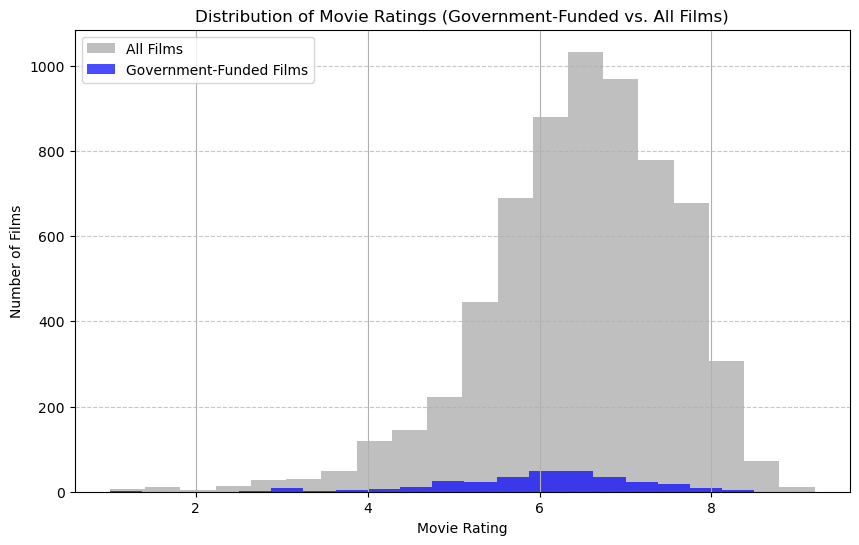

In [52]:
plt.figure(figsize=(10, 6))

# Histogram for all films
data['ratings'].hist(bins=20, alpha=0.5, color='gray', label="All Films")

# Histogram for government-funded films
gov_funded['ratings'].hist(bins=20, alpha=0.7, color='blue', label="Government-Funded Films")

plt.xlabel("Movie Rating")
plt.ylabel("Number of Films")
plt.title("Distribution of Movie Ratings (Government-Funded vs. All Films)")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()



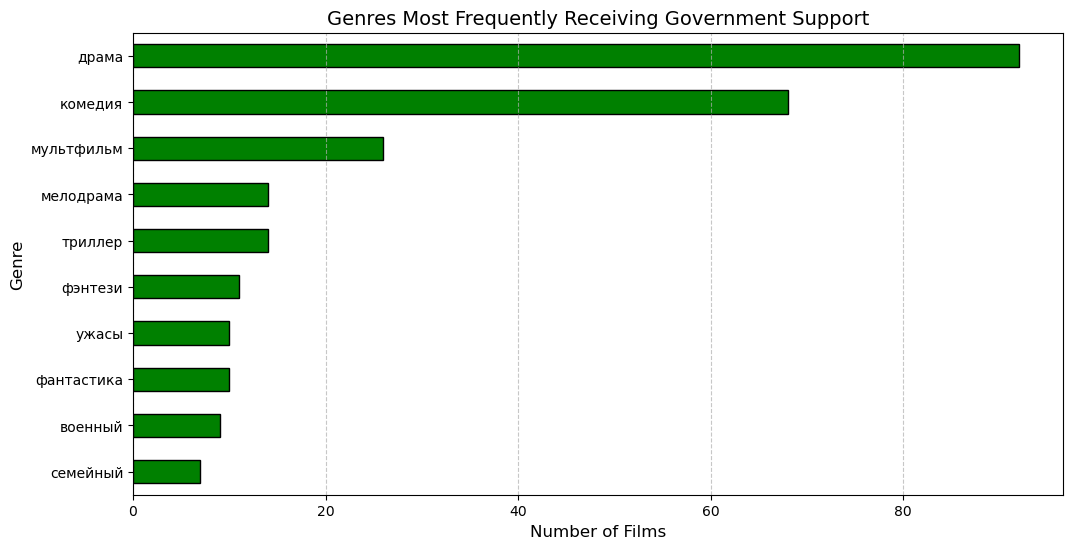

In [53]:
# Which genres most frequently receive government support?
# Exclude "unknown genre"
gov_funded_no_unk = gov_funded[gov_funded['main_genre'] != 'Unknown Genre']

# Determine the top 10 genres receiving government support
top_genres = gov_funded_no_unk['main_genre'].value_counts().head(10)

# Plot the graph
plt.figure(figsize=(12, 6))
top_genres.sort_values().plot(kind='barh', color='green', edgecolor='black')

plt.xlabel("Number of Films", fontsize=12)
plt.ylabel("Genre", fontsize=12)
plt.title("Genres Most Frequently Receiving Government Support", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()



In [54]:
# Exclude films with zero box office revenue
gov_funded = gov_funded[gov_funded['box_office'] > 0]

# TOP-5 most successful government-funded films
top_profitable = gov_funded.sort_values(by='profitability', ascending=False).head(5)
print("TOP-5 Most Successful Government-Funded Films:")
print(top_profitable[['title', 'budget', 'box_office', 'profitability']])
print('-------')

# TOP-5 most unprofitable government-funded films
top_losses = gov_funded.sort_values(by='profitability', ascending=True).head(5)
print("TOP-5 Most Unprofitable Government-Funded Films:")
print(top_losses[['title', 'budget', 'box_office', 'profitability']])



TOP-5 Most Successful Government-Funded Films:
                  title         budget       box_office  profitability
7456              Холоп 160,000,000.00 3,073,568,690.79          19.21
5708                Лёд 148,585,222.00 1,445,731,797.89           9.73
5749            Я худею  87,649,127.00   633,462,266.74           7.23
3229      Гуляй, Вася !  39,000,000.00   259,099,078.00           6.64
2701  Самый Лучший День 130,619,336.00   683,029,061.40           5.23
-------
TOP-5 Most Unprofitable Government-Funded Films:
                      title         budget  box_office  profitability
3149              Я-Учитель  91,000,000.00    1,550.00           0.00
3504                День До  90,822,766.00    9,000.00           0.00
2803  Битва с экстрасенсами  59,560,746.00    6,000.00           0.00
2527      Вдвоем на льдине.  37,943,652.00    4,450.00           0.00
3657      Простая история . 180,000,000.00   58,720.00           0.00


## **Interim Conclusion on the Analysis of Government-Funded Films**

### **Objective of the Analysis**  
In this section, we examined government-funded films to answer the following questions:  
- Are these films profitable? (Comparison of budget and box office revenue)  
- What ratings do they receive? (Quality vs. profitability)  
- Which genres most frequently receive funding?  
- Which government-supported films were the most successful and which were the biggest failures?  

### **Key Findings**  
- **Total amount of government funding**: **42.2 billion RUB**.  
- **Average profitability of government-funded films**: **0.73** (most films do not break even).  
- **Average rating of government-supported films**: **6.02** (roughly in line with all films).  
- **Most frequently funded genres**: dramas, comedies, and animated films.  
- **Most successful film by profitability**: *"Kholop"* (earned **19 times its budget**).  
- **Most unprofitable films**: some grossed **less than 10,000 RUB** despite having a large budget.  

### **Analysis of Findings**  
- **Government funding does not guarantee box office success**. Most films are unprofitable.  
- **Domestic box office hits** with government support exist, but they are **very rare**.  
- **Ratings of government-funded films are similar to all films**, but this does not mean they perform well financially.  

### **Challenges and Issues**  
- **Some films had a budget of 0 but received funding** — possible data errors.  
- **Imported films were also included in the analysis** — filtering only Russian productions would be more accurate.  
- **Placeholder values for missing data** (e.g., "unknown genre") were included, skewing results.  

### **Recommendations for Further Analysis**  
- **Analyze successful and failed films separately** to identify patterns.  
- **Study the impact of budget and genre on box office revenue** — some combinations may be more profitable.  
- **Consider only Russian films** when comparing funded vs. non-funded projects.  
- **Examine the distribution of government funding** — its allocation may not be effective.  

### **Conclusion**  
Government funding **does not guarantee commercial success**. While some projects achieve high profitability, **most films are unprofitable**. This suggests that a deeper analysis is needed to understand the factors influencing the profitability and quality of funded films. 🚀  


## **Final Conclusion on the Exploratory Analysis of Box Office Data**

### 🔍 **Data Processing**
- Data preprocessing was conducted, including type conversion, handling of missing values, duplicates, and anomalies.
- Significant gaps were found in budget and government funding data — over **95% of values were missing**, requiring replacement with **0** or placeholders.
- **745 duplicate titles (`title`) and 2 duplicate distribution certificate numbers (`puNumber`)** were identified.
- **17 anomalous films** were found where the budget was lower than the amount of government funding received.
- **Categorical data was normalized**, extra spaces and case inconsistencies were removed, and incorrect values were corrected.

### 🔍 **Key Analysis Results**

#### **Box Office Trends Over the Years**
- **Before 2014, box office data is scarce**, and median revenues are **zero**.
- **From 2015, data becomes more complete**, but **average revenues still greatly exceed median values**, indicating the presence of rare blockbusters.
- **The highest total box office revenue was recorded in 2018 (49.7 billion RUB), while the lowest was in 2010 (2.4 million RUB).**

#### **Age Restrictions and Box Office Performance**
- **Films rated `16+` (76 billion RUB) and `12+` (60 billion RUB) generated the highest revenue.**
- **The lowest revenue was for `0+` films (0.8 billion RUB), likely due to a lack of content targeting this audience.**
- **Films rated `18+` earned less**, probably due to audience restrictions.

#### **Profitability of Government-Funded Films**
- **The average profitability of government-funded films is 0.73** – most **do not break even**.
- **Total government funding amounted to 42.2 billion RUB**.
- **The most profitable film was *"Kholop"*, which earned 19 times its budget.**
- **The most unprofitable films had zero profitability**, despite receiving substantial funding.

#### **Most Commonly Funded Genres**
- **Dramas, comedies, and animated films** receive the most government funding.
- **Horror, sci-fi, and thrillers receive the least support**.

### ⚠ **Challenges and Limitations**

#### **Outliers and Anomalies**
- **17 films had a budget lower than the government funding received.**
- **Films with a zero budget still received large subsidies**, indicating possible data errors.

#### **Data Issues**
- **Many missing values** in budget and box office figures, especially before **2014**.
- **Categorical columns had problems**, with multiple values combined in a single cell.

#### **Uneven Box Office Revenue Distribution**
- **A few blockbusters dominate average box office numbers**, while **most films earn significantly less**.

### 📌 **Conclusion**
- **Government funding does not guarantee a film’s success** – many projects remain unprofitable.
- **Box office revenue is highly uneven** – a small number of blockbusters generate the majority of income.
- **Genre and age rating influence box office performance**, but they are not the only success factors.
- **Box office data is incomplete before 2014**, so **later periods should be analyzed for more reliable insights**.

### 🚀 **Recommendations for Further Analysis**
✔ **Deeply analyze factors contributing to film success**: compare genres, budgets, and ratings.  
✔ **Evaluate the distribution of government funding** – is it being allocated efficiently?  
✔ **Compare average box office revenue across genres and age ratings** to identify more profitable combinations.  
✔ **Consider the impact of marketing and competition**, as box office revenue is influenced by factors beyond film quality.

Overall, this study highlights the importance of a **comprehensive analysis** when assessing the profitability and success of films. 🎬
